In [1]:
#Importing Libraries
import pandas as pd
import statistics as stats
import numpy as np
import math
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
#Read training and test data
train = pd.read_csv("train.csv")
testDF = pd.DataFrame(pd.read_csv("test.csv"))
#Output dataset---Survival 

gender_submission = pd.read_csv("gender_submission.csv")

In [8]:
#convert into DataFrames
trainData = pd.DataFrame(train)
testData = pd.DataFrame(testDF)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  




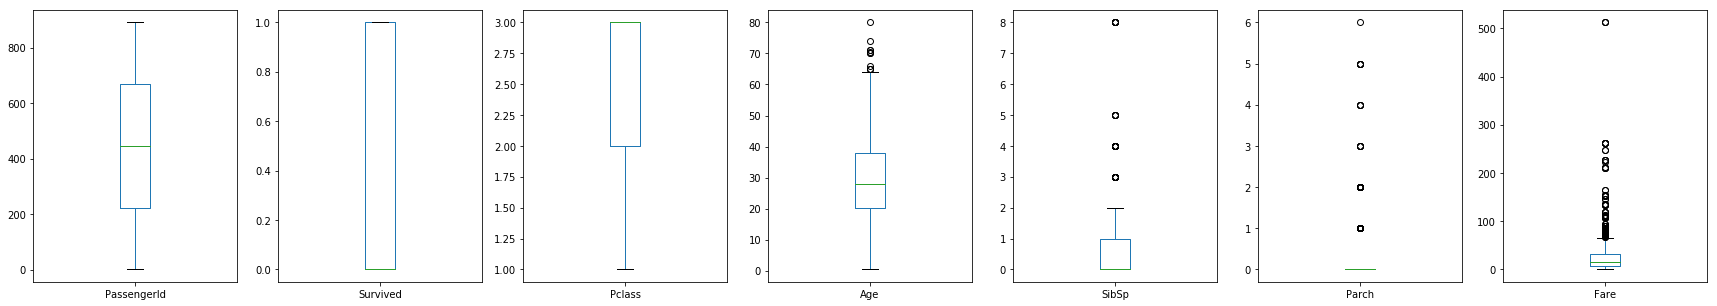

In [4]:
print(trainData.head())
print("\n\nINFORMATION")
print(trainData.info())

trainData.plot(kind='box',subplots=True,figsize=(30,5))
plt.show()

In [5]:
#Preprocessing
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

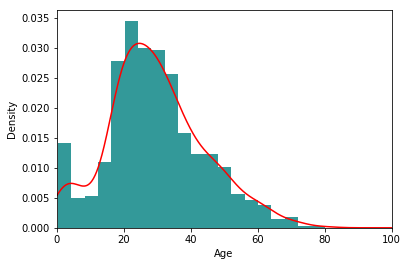

In [6]:
#Age
ax = trainData["Age"].hist(bins=20, density=True, stacked=True, color='teal', alpha=0.8)
trainData["Age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(0,100)
plt.show()

In [9]:
#Age-- All the null value replaced by mean
#For train Data

tempAge1=np.nanmean(trainData['Age'])
tempAge2=np.nanmedian(trainData['Age'])
print(tempAge1,tempAge2)
for i in range(len(trainData['Age'])):
    if np.isnan(trainData['Age'][i]):
        trainData['Age'][i]=tempAge2

#For Test Data
for i in range(len(testData['Age'])):
    if np.isnan(testData['Age'][i]):
        testData['Age'][i]=tempAge2


29.36158249158249 28.0


C:\Users\Upendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
'''
MenAge=[]
WomenAge=[]
ChildAge=[]
for i in range(len(trainData['Age'])):
    if ~np.isnan(trainData['Age'][i]):
        if "Mr." in trainData['Name'][i]:
            MenAge.append(trainData['Age'][i])
        elif "Mrs." in trainData['Name'][i]:
            WomenAge.append(trainData['Age'][i])
        elif "Master" or "Miss" in trainData['Name'][i]:
            ChildAge.append(trainData['Age'][i])
        else:
            continue
            
for i in range(len(trainData['Age'])):
    if np.isnan(trainData['Age'][i]):
        if "Mr." in trainData['Name'][i]:
            trainData['Age'][i]=stats.median(MenAge)
        elif "Mrs." in trainData['Name'][i]:
            trainData['Age'][i]=stats.median(WomenAge)
        elif "Master" or "Miss" in trainData['Name'][i]:
            trainData['Age'][i]=stats.median(ChildAge)
        else:
            continue
'''

C:\Users\Upendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Upendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Upendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


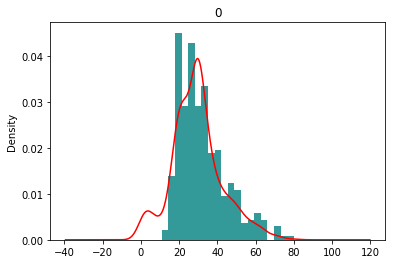

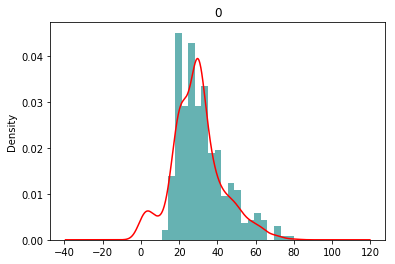

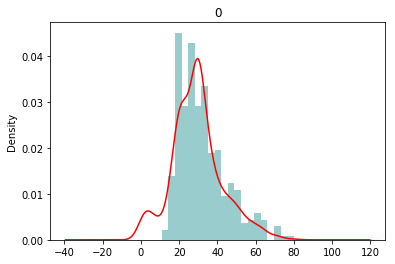

In [31]:
'''
MenAgeDF = pd.DataFrame(MenAge)
WomenAgeDF = pd.DataFrame(WomenAge)
ChildAgeDF = pd.DataFrame(ChildAge)

ax = MenAgeDF.hist(bins=20, density=True, stacked=True, color='teal', alpha=0.8)
trainData["Age"].plot(kind='density', color='red')
ax1 = MenAgeDF.hist(bins=20, density=True, stacked=True, color='teal', alpha=0.6)
trainData["Age"].plot(kind='density', color='red')
ax2 = MenAgeDF.hist(bins=20, density=True, stacked=True, color='teal', alpha=0.4)
trainData["Age"].plot(kind='density', color='red')

plt.show()
'''

In [10]:
#Fare
meanFare = np.nanmean(trainData['Fare'])
print(meanFare)
#For Test Data
#['Fare'][152])
for i in range(len(testData['Fare'])):
    if np.isnan(testData['Fare'][i]):
        testData['Fare'][i]=meanFare
        print(i)

32.204207968574636
152


C:\Users\Upendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
#Embarked

trainData['Embarked']=trainData['Embarked'].fillna('S')

#One hot encode
trainData = trainData.join(pd.get_dummies(trainData['Embarked']).rename(columns={'C':'Cherbourg','Q':'Queenstown','S':'Southampton'}))

In [11]:
#Sex
trainData.loc[trainData['Sex']=='male','Sex']=0
trainData.loc[trainData['Sex']=='female','Sex']=1

testData.loc[testData['Sex']=='male','Sex']=0
testData.loc[testData['Sex']=='female','Sex']=1

In [12]:
trainData['Sex']=trainData['Sex'].astype('int64',axis=1)
testData['Sex']=testData['Sex'].astype('int64',axis=1)

In [35]:
#One Hot Code Encoding
#values = array(trainData['Sex'])
#label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(values)
#onehot_encoder = OneHotEncoder(sparse=False)
#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#print(onehot_encoded)

In [30]:
trainData.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


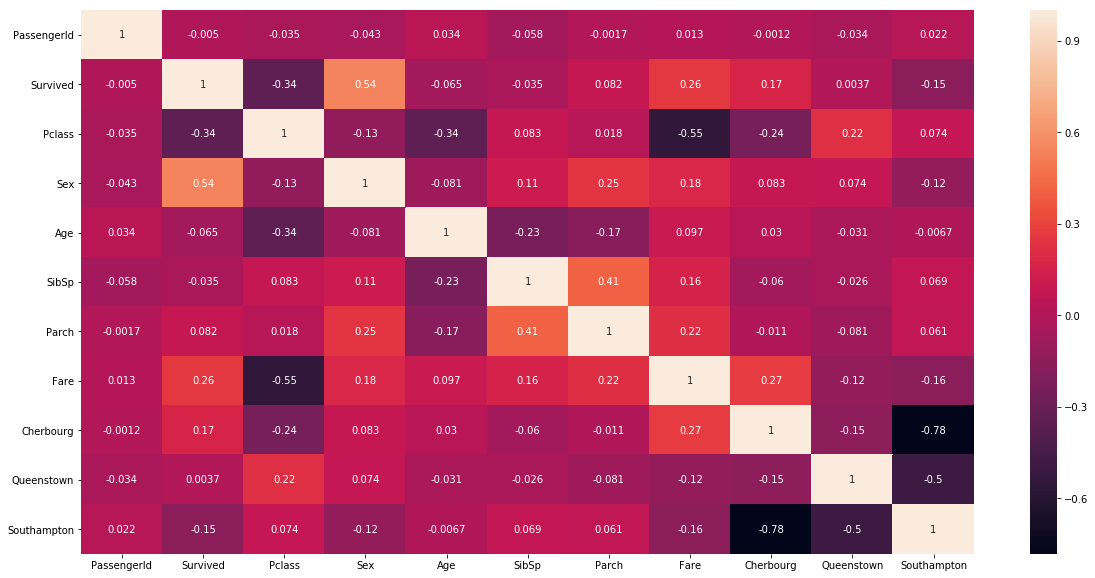

In [31]:
corr = trainData.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax =ax)

In [32]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cherbourg,Queenstown,Southampton
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [33]:
#Train Dataset & Test Dataset

#y = trainData['Survived']
#X = trainData[['Sex','Age','Fare','SibSp','Parch']]


#X_test=testData[['Sex','Age','Fare','SibSp','Parch']]


X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Linear Regression Model

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression()
lm.fit(X,y)
predictions = lm.predict(X_test)
print("Mean Squared Error:",metrics.mean_squared_error(y_test,predictions))
print("Score:",lm.score(X_test,y_test))
#plt.scatter(y_test,predictions)

Mean Squared Error: 0.15653950174857753
Score: 0.33075635871489095


# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr').fit(X, y)
#
y_pred=clf.predict(X_test)

clf.predict_proba(X_test) 
#print(clf.predict_proba(X_test) )

print("Score:",clf.score(X_test, y_test))

Score: 0.7835820895522388


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[148  20]
 [ 26  74]]


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.88      0.87       168
          1       0.79      0.74      0.76       100

avg / total       0.83      0.83      0.83       268



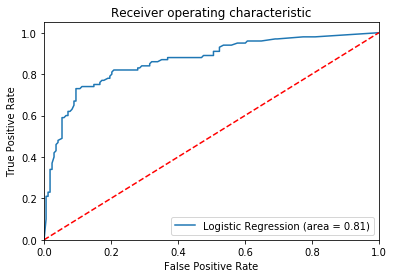

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=100,random_state=84)
clf.fit(X,y)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print(y_pred)

Accuracy: 0.8283582089552238


In [37]:
print(len(y_pred))

268


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

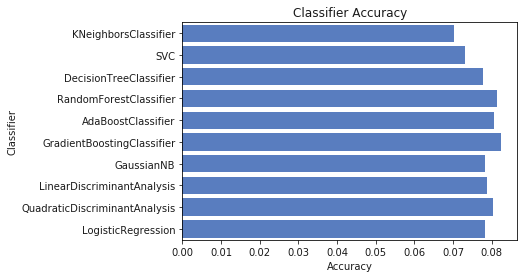

In [45]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

#X = trainData
#y = train[0::, 0]

acc_dict = {}


for clf in classifiers:
	name = clf.__class__.__name__
	clf.fit(X, y)
	train_predictions = clf.predict(X_test)
	acc = accuracy_score(y_test, train_predictions)
	if name in acc_dict:
		acc_dict[name] += acc
	else:
		acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [47]:
clf_best=GradientBoostingClassifier()
clf_best.fit(X, y)
train_predictions = clf_best.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print(acc)

0.8246268656716418


# Print output

In [28]:
output=pd.DataFrame(testData['PassengerId'])
output['Survived']=y_pred
print(output)
output.to_csv('Result.csv',index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         1
3            895         1
4            896         1
5            897         0
6            898         0
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         1
18           910         0
19           911         0
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         1
28           920         1
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
3